# Метод Ньютона и Дихотамии

1. Реализовать **метод Ньютона** с конфигурациями:
    - С точностью ```E = 0.1```
    - С точностью ```E = 0.01```
    - С учетом кратности корня
    
    
2. Реализовать **обобщенный метод ньютона метод Ньютона** с точностью ```E = 0.1``` и:
    - С начальным приближением ```x = -2 ```
    - С начальным приближением ```x = -2 ``` и приминением "кухонного метода"
 
 
3. Реализовать **метод Дихотамии** с конфигурациями:
    - С точностью ```E = 0.1```
    - С точностью ```E = 0.01```



В качестве примера взять функцию ```(x - 1)(x - 2)^2(x - 3)^3 = 0```

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'Y')

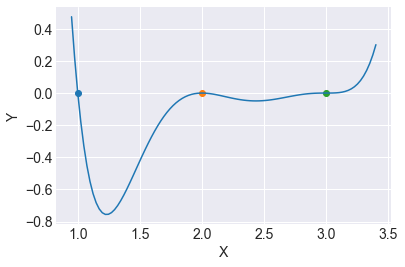

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%pylab inline
plt.style.use('seaborn-dark')
plt.rc('font', size=14)

import warnings
warnings.filterwarnings("ignore")


def func(x):
    return (x - 1) * (x - 2)**2 * (x - 3)**3

x = np.linspace(0.95, 3.4, 100)
fig = plt.figure()
plt.plot(x, [func(num) for num in x])
plt.scatter(1, 0)
plt.scatter(2, 0)
plt.scatter(3, 0)
plt.grid(lw=1)
plt.xlabel('X')
plt.ylabel('Y')

In [2]:
def derivative(f, x, dx):
    return (f(x+dx) - f(x-dx))/(2*dx)

## 1. Метод Ньютона

In [3]:
def nuton_simple(f, x0, EPS=1e-6, xn=None, x=0):
    t, t0, tn = x, x0, xn
    
    count = 0
    while count < 100:
        
        try:
            xn = x0 - f(x0) / derivative(f, x0, 0.0001)
            count += 1
        except ZeroDivisionError as e:
            return None
        
        q = (xn - x0) / (x0 - x)
        if abs((xn - x0)/(1 - q)) < EPS:            
            p = 1 / (1 - q)
            solver = lambda x: f(x) / (abs(x - xn))**p
            ans = nuton_simple(solver, t0, EPS, tn, t)
            if ans is not None:
                res = [t for t in ans]
                res.append([xn, p, count])
                return  res
            else:
                return [[xn, p, count],]
        
        else:
            x, x0 = x0, xn
    
    return None

In [4]:
res = nuton_simple(func, 4, EPS=0.01)
pd.DataFrame(res, index=range(len(res)), columns=['Корень', 'Кратность', 'Итерации'])

,Корень,Кратность,Итерации
0,1.000000,1.000607,4
1,2.003270,2.019852,10
2,3.005171,3.047619,15


In [5]:
res = nuton_simple(func, 4, EPS=0.1)
pd.DataFrame(res, index=range(len(res)), columns=['Корень', 'Кратность', 'Итерации'])

,Корень,Кратность,Итерации
0,2.026786,2.179672,6
1,3.055438,3.448099,9


## 2. Обобщенный метод Ньютона

In [6]:
def nuton_general(f, x0, EPS=1e-6, xn=None, x=0, k=0):
    t, t0, tn = x, x0, xn
    
    count = 0
    while count < 100:
        
        try:            
            ksi = - f(x0) / derivative(f, x0, 0.0001)
            
            psi1 = f(x0 + ksi)**2
            psi0 = f(x0)**2

            tay = (psi0 + k * psi1) / (psi0 + psi1)
            
            xn = x0 + tay*ksi
            
            count += 1
        except ZeroDivisionError as e:
            return None
        
        q = (xn - x0) / (x0 - x)
        if abs((xn - x0)/(1 - q)) < EPS:            
            p = 1 / (1 - q)
            solver = lambda x: f(x) / (abs(x - xn))**p
            ans = nuton_general(solver, t0, EPS, tn, t, k)
            if ans is not None:
                res = [t for t in ans]
                res.append([xn, p, count])
                return  res
            else:
                return [[xn, p, count],]
        
        else:
            x, x0 = x0, xn
    
    return None

In [7]:
res = nuton_general(func, 4, EPS=0.01)
pd.DataFrame(res, index=range(len(res)), columns=['Корень', 'Кратность', 'Итерации'])

,Корень,Кратность,Итерации
0,2.003242,2.131022,9
1,1.000000,1.026326,9
2,3.006665,3.330968,16


### Исследование работы обобщенного метода Ньютона на примере функции ```e^x - 2 = 0```

Text(0, 0.5, 'Y')

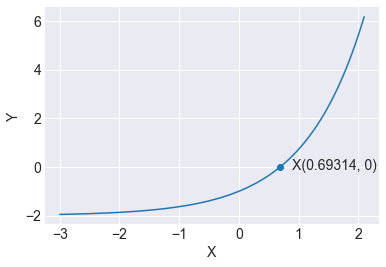

In [8]:
def expX(x):
    return exp(x) - 2

x = np.linspace(-3, 2.1, 100)
fig = plt.figure()
plt.plot(x, [expX(num) for num in x])
plt.scatter(log(2), 0)
plt.annotate('X({}, {})'.format(log(2)*100000//1/100000, 0), xy=(log(2)+0.2, 0-0.1))
plt.grid(lw=1)
plt.xlabel('X')
plt.ylabel('Y')

In [9]:
# Поиск решения классическим методом Ньютона
columns = ['Корень', 'Кратность', 'Итерации']
res = nuton_simple(expX, -2, EPS=0.1)
df = pd.DataFrame(res, index=['NutonSimple' for _ in range(len(res))], columns=columns)

# Поиск решения классическим обобщенным методом Ньютона
res = nuton_general(expX, -2, EPS=0.1)
tmp = pd.DataFrame(res, index=['NutonGeneral' for _ in range(len(res))], columns=columns)
df = df.append(tmp)

# Поиск решения классическим обобщенным методом Ньютона с учетом "кухонного метода", k=0.1
res = nuton_general(expX, -2, EPS=0.1, k=0.1)
tmp = pd.DataFrame(res, index=['NutonGeneral_with_k=0.1' for _ in range(len(res))], columns=columns)
df = df.append(tmp)

# Поиск решения классическим обобщенным методом Ньютона с учетом "кухонного метода", k=0.01
res = nuton_general(expX, -2, EPS=0.1, k=0.01)
tmp = pd.DataFrame(res, index=['NutonGeneral_with_k=0.01' for _ in range(len(res))], columns=columns)
df = df.append(tmp)

# Правильное решение 
tmp = pd.DataFrame([[log(2), 1, 0]], index=['CorrectAnswer'], columns=columns)
df = df.append(tmp)
print('EPS = {}'.format(0.1))
df

EPS = 0.1


,Корень,Кратность,Итерации
NutonSimple,0.693178,1.069541,15
NutonGeneral,-2.000000,1.000000,1
NutonGeneral_with_k=0.1,0.693655,0.905869,5
NutonGeneral_with_k=0.01,0.694228,0.897836,22
CorrectAnswer,0.693147,1.000000,0


## 3. Метод Дихотамии

Text(0, 0.5, 'Y')

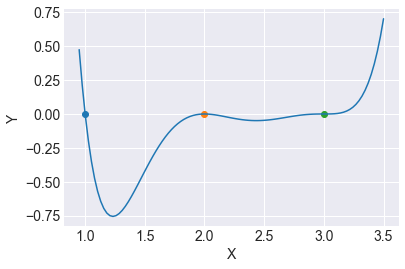

In [12]:
x = np.linspace(0.95, 3.5, 100)
fig = plt.figure()
plt.plot(x, [func(num) for num in x])
plt.scatter(1, 0)
plt.scatter(2, 0)
plt.scatter(3, 0)
plt.grid(lw=1)
plt.xlabel('X')
plt.ylabel('Y')

In [13]:
def dehotami_simple(f, x1, x2, EPS=0.1):
    t1, t2, = x1, x2
    
    count = 0
    while count < 100:
        count += 1
        x = (x1 + x2) / 2
        
        if abs(x1 - x2) < 2*EPS:
            solver = lambda val: f(val) / (val - x)
            ans = dehotami_simple(solver, t1, t2, EPS)
            
            if ans is not None:
                res = [t for t in ans]
                res.append([x, count])
                return res
            else:
                return [[x, count],]
        
        if f(x1)*f(x) <= 0:
            x2 = x
        elif f(x2)*f(x) <=0 :
            x1 = x
        else:
            tmp = np.random.random()*(x2-x1) + x1
            if f(tmp)*f(x1) <= 0:
                x2 = tmp
            elif f(tmp)*f(x2) <= 0:
                x1 = tmp
            
    return None

res = dehotami_simple(func, -1, 4, EPS=0.01)
pd.DataFrame(res, index=range(len(res)), columns=['Корень', 'Итерации'])

,Корень,Итерации
0,1.001953,9
1,0.993124,24
2,2.994141,9
3,2.991206,13
4,2.994141,9
5,1.001953,9


In [14]:
res = dehotami_simple(func, -1, 4, EPS=0.001)
pd.DataFrame(res, index=range(len(res)), columns=['Корень', 'Итерации'])

,Корень,Итерации
0,2.999634,13
1,1.000122,13
